In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pandas.read_csv('http://pogo.software/me4ml/xray.csv')
x = np.array(df['Distance (mm)'])
y = np.array(df['Total absorption'])

In [3]:
x_sum = sum(x)
x2_sum = sum(x**2)
x3_sum = sum(x**3)
x4_sum = sum(x**4)
x_y_sum = np.dot(x,y)
x2_y_sum = np.dot(x**2,y)
y_sum = sum (y)
m = len(x)
A = np.array([[x_sum, x2_sum],
              [m, x_sum]
              ])
b = np.array([x_y_sum, y_sum])

# Calcualte B from AB = b
B = np.linalg.solve(a = A, b = b)
X = np.linspace(0,6,200)
y_pred_linear = B[0] + B[1]*X

A = np.array([[x2_sum, x3_sum, x4_sum],
              [x_sum, x2_sum, x3_sum],
              [m, x_sum, x2_sum]
              ])
b = np.array([x2_y_sum, x_y_sum, y_sum])
# Calcualte B from AB = b
B = np.linalg.solve(a = A, b = b)
y_pred_quad = B[0] + B[1]*X + B[2]*X**2

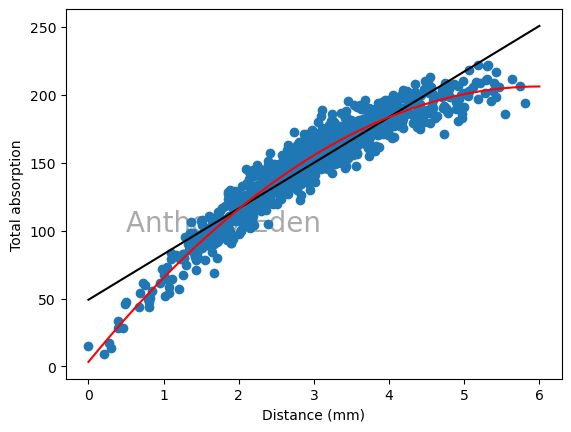

In [4]:
#Linear Regression Plot
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.text(0.5, 100, 'Anthony Eden', size = 20, zorder = 0, color = '#aaaaaa')
ax.plot(X,y_pred_linear, c ='black')
ax.set_xlabel('Distance (mm)')
ax.set_ylabel('Total absorption')

## Quadratic Regression Plot
ax.plot(X,y_pred_quad, c = 'red')

## Ultrasonic Pipe Inspection

In [5]:
# read in the CSV file
df = pandas.read_csv('http://pogo.software/me4ml/hdpeVel.csv')
# set the 'index' column as the one containing the temperature values
df = df.set_index('T/C f/MHz')

# extract the frequency values (and scale since they are MHz)
freq = df.columns.values.astype(float) * 1e6
# extract the temperature values
temp = df.index.values.astype(float)

# extract the main part - the velocity values
vel = df.to_numpy()
# calculate the total number of values
tot_values = len(freq) * len(temp)

In [6]:
x1grid, x2grid = np.meshgrid(freq, temp) 
# Flatten both grids then pair up each point from the origional grid (we've increased the dimension by 1 so that each point has a vector [freq,temp])
Xgrid = np.concatenate([x1grid.reshape([tot_values, 1]), 
	x2grid.reshape([tot_values, 1])], axis=1) 
ygrid = vel.reshape([tot_values, 1])

### Linear Regression Approach

In [13]:
reg = LinearRegression()
reg.fit(Xgrid, ygrid)
y_lin = reg.predict(Xgrid)

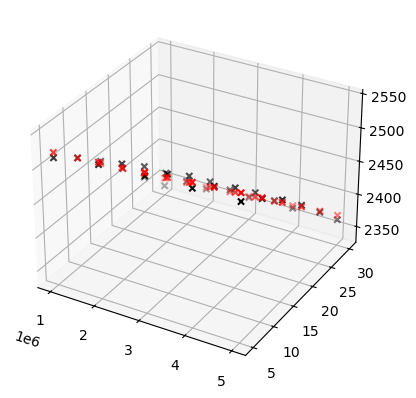

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(Xgrid[:,0], Xgrid[:,1], ygrid, marker = 'x', color = '#000000')
ax.scatter(Xgrid[:,0], Xgrid[:,1], y_lin, marker = 'x', color = '#ff0000')

### Quadratic regression treating high order terms as seperate variables

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(Xgrid)

In [22]:

Xgrid.shape, X_poly.shape 

((30, 2), (30, 6))

Notice we've transformed the feature space from $$x_1,x_2  \rarr 1, x_1, x_2, x_1^2, x_1x_2, x_2^2$$

In [24]:
reg_poly = LinearRegression()
reg_poly.fit(X_poly, ygrid)
y_poly = reg_poly.predict(X_poly)

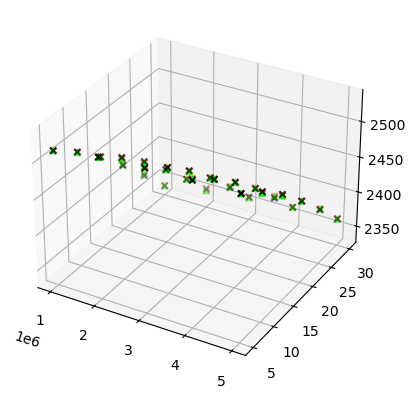

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(Xgrid[:,0], Xgrid[:,1], ygrid, marker = 'x', color = '#000000')
ax.scatter(Xgrid[:,0], Xgrid[:,1], y_poly, marker = 'x', color = '#ff0000')
ax.scatter(Xgrid[:,0], Xgrid[:,1], y_poly, marker = '^', color = '#00ff00')